In [2]:
from cgi import print_environ
from time import time
import pandas as pd
from sklearn import datasets
from Preprocessor import Preprocessor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import fasttext

from Vectorizing.CountVectorizer import getCountVectorizer
from Vectorizing.TF_IDF_Vectorizer import getWordLevelVectorizer, getNGramLevelVectorizer
from Embedding.WordEmbedding import createWordEmbedding
from Report import Report
#from writeResults import writeResults
from Report.CrossValidateNN import cross_validate_NN
from lstmModel import create_lstm_model, create_bidirec_lstm_model

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, make_scorer, accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
TEXT = "Text"
LABEL = "Label"

In [6]:
df_train = pd.read_csv('../data/readme_new_preprocessed_train.csv', sep=';')
df_test = pd.read_csv('../data/readme_new_preprocessed_test.csv', sep=';')
df_train = df_train.drop(df_train[df_train['Label'] == 'General'].index)
#df_train = df_train.drop(df_train[df_train['Label'] == 'Other'].index)
df_test = df_test.drop(df_test[df_test['Label'] == 'General'].index)
#df_test = df_test.drop(df_test[df_test['Label'] == 'Other'].index)

print(df_test['Label'].unique())

#Preprocessor(df_train).run()
#Preprocessor(df_test).run()

#clf = OneVsRestClassifier(SVC()).fit(X, y)

['Sequential' 'Natural Language Processing' 'Computer Vision' 'Audio'
 'Reinforcement Learning' 'Graphs']


In [7]:
print(df_train['Label'].unique())

['Sequential' 'Natural Language Processing' 'Computer Vision' 'Audio'
 'Reinforcement Learning' 'Graphs']


In [8]:
x_train = df_train[TEXT]
y_train = df_train[LABEL]
x_test = df_test[TEXT]
y_test = df_test[LABEL]

In [9]:
# CountVecotirzing
count_vect = getCountVectorizer(df_train, TEXT)
xtrain_count = count_vect.transform(x_train)
xtest_count = count_vect.transform(x_test)
#if test is undersampled:
#xtest_count = count_vect.transform(x_test[TEXT])

count vectorizer done


In [10]:
clf = OneVsRestClassifier(SVC()).fit(xtrain_count, y_train)

In [11]:
y_pred = clf.predict(xtest_count)

In [12]:
clf.predict(count_vect.transform(['vision detects convolution vision 3d 3d 3d image image image detection image image']))

array(['Computer Vision'], dtype='<U27')

In [13]:
y_unique = y_test.unique()
cm = confusion_matrix(y_test, y_pred, labels=y_unique)
cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
m = precision_recall_fscore_support(y_test, y_pred, average='weighted')
precision = m[0]
recall = m[1]
f1score = m[2]
print(f"Precision: {m[0]} \nRecall: {m[1]} \nF1-score: {m[2]}")

Accuracy: 0.8262773722627738
Precision: 0.7688059414898734 
Recall: 0.8262773722627738 
F1-score: 0.7876887961611707


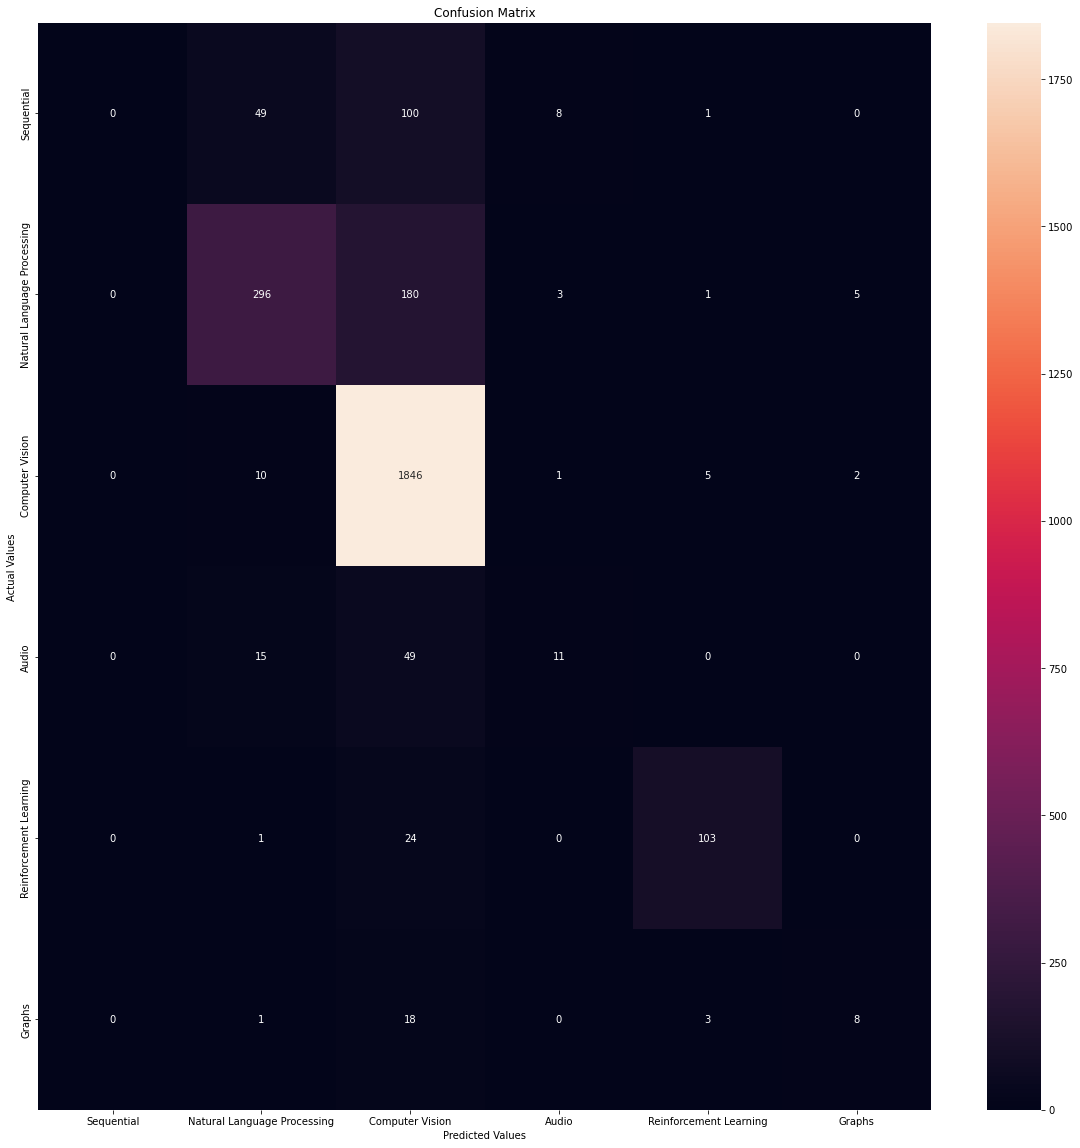

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()